### Step 1 -- handling missing values 

#### Types of Missing data --

1. Missing completely at random, MCAR:
A variable is missing completely at random (MCAR) if the prob of being missing is the same for all the observations. When the data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

2. Missing data not at random (MNAR):
there is relationship between the data missing and any other values, observed or missing, within the dataset.

3. Missing at random (MAR):
hiding values intentionally, ex: men--salary

#### Types of data -- 

1) continuous 
2) discrete data
3) categorical data

### All the techniques for handling missing values

1. Replace missing values with central values like mean/median/mode
2. random sample imputation
3. capturing NAN values with a new feature
4. end of distribution imputation
5. Arbitary imputation
6. frequent categories imputation

In [1]:
import pandas as pd
import seaborn as sns
## read data

df = sns.load_dataset('titanic')
df.head()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\Shrinath\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Shrinath\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Shrinath\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Shrinath\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Shrinath\anaconda

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\Shrinath\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Shrinath\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Shrinath\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Shrinath\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Shrinath\anaconda

AttributeError: _ARRAY_API not found

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
## Count of missing values in data

### with isna
print("isna -- \n",df.isna().sum())

### with isnull
print("isnull -- \n",df.isnull().sum())

isna -- 
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
isnull -- 
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


#### 1. Replace missing values with central values like mean/median/mode

when to apply?
data missing completely at random
replacing NAN values with the most frequent occurence of the variables


Advantages --
1. easy to implement (robust to outlier)
2. faster way to obtain complete dataset

Disadvantages --
1. change or distortion in the original variance
2. Impact correlation

In [3]:
df = sns.load_dataset('titanic')
df = df[['age','fare','survived']]
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [4]:
## percentage of missing values

df.isnull().mean()

age         0.198653
fare        0.000000
survived    0.000000
dtype: float64

In [5]:
## function of imputing average valeus for missing values

def imput_nan(df,variable,average):
    df[variable+"_median"] = df[variable].fillna(median)

In [6]:
median = df.age.median()
median

np.float64(28.0)

In [7]:
imput_nan(df,'age',median)

df.head()

,age,fare,survived,age_median
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


#### 2. random sample imputation

aim: consists of taking random obs from dataset and use this obs to replace nan values

used when data is MCAR

###### Advantages:
1. easy to implement
2. less distortion in variance

###### Disadvantages:
1. every situation randomness won't work

In [8]:
df = sns.load_dataset('titanic')

df = df[['age','fare','survived']]
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [9]:
df.isnull().sum()

age         177
fare          0
survived      0
dtype: int64

In [10]:
def imput_nan(df,variable,average):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    # random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # pandas need to have same index in order to merge dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [11]:
imput_nan(df,'age',median)

In [12]:
df.head()

,age,fare,survived,age_median,age_random
0,22.0,7.2500,0,22.0,22.0
1,38.0,71.2833,1,38.0,38.0
2,26.0,7.9250,1,26.0,26.0
3,35.0,53.1000,1,35.0,35.0
4,35.0,8.0500,0,35.0,35.0


##### 3. capturing NAN values with a new feature

works well when missing completely not at random

In [13]:
df = sns.load_dataset('titanic')

df = df[['age','fare','survived']]
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [14]:
import numpy as np

df['age_nan']= np.where(df['age'].isnull(),1,0)
df.head()

,age,fare,survived,age_nan
0,22.0,7.2500,0,0
1,38.0,71.2833,1,0
2,26.0,7.9250,1,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0


Advantages:
1. easy to implement
2. It captures importance of missing values

Disadvantages:
1. creating additional feature

#### 4. end of distribution imputation

In [15]:
df = sns.load_dataset('titanic')

df = df[['age','fare','survived']]
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


<Axes: >

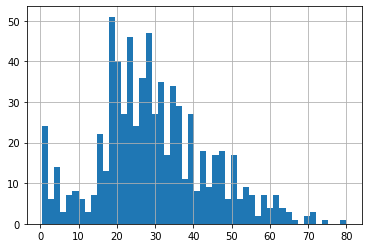

In [16]:
df.age.hist(bins=50)

In [17]:
extreme = df.age.mean() + 3*df.age.std()

<Axes: ylabel='age'>

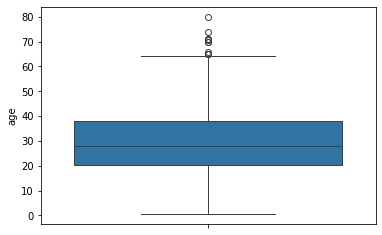

In [18]:
## boxplot

sns.boxplot(data=df['age'])

In [19]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [20]:
impute_nan(df, 'age', median, extreme)

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_2756\1326501233.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(median,inplace=True)


In [21]:
df.head(10)

,age,fare,survived,age_end_distribution
0,22.0,7.2500,0,22.00000
1,38.0,71.2833,1,38.00000
2,26.0,7.9250,1,26.00000
3,35.0,53.1000,1,35.00000
4,35.0,8.0500,0,35.00000
5,28.0,8.4583,0,73.27861
6,54.0,51.8625,0,54.00000
7,2.0,21.0750,0,2.00000
8,27.0,11.1333,1,27.00000
9,14.0,30.0708,1,14.00000


<Axes: ylabel='age_end_distribution'>

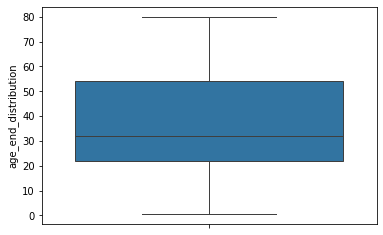

In [22]:
sns.boxplot(df['age_end_distribution'])

#### 5. Arbitary imputation

It consists of replacing NAN by an arbitary value

adv --
1. easy to implement
2. captures the importance of missingness if there is one

disadv --
1. distorts the original distribution of variable
2. if missingness is not important, it may mask the predictive power of original variable
3. hard to decide which value to use

In [23]:
df = sns.load_dataset('titanic')

df = df[['age','fare','survived']]
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [24]:
### Arbitary value
#### It should be more frequently present

def impute_nan(df,variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_100'] = df[variable].fillna(100)

In [25]:
impute_nan(df,'age')

<Axes: >

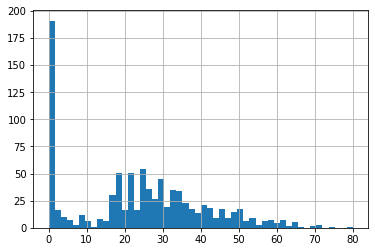

In [26]:
df['age_zero'].hist(bins=50)

<Axes: >

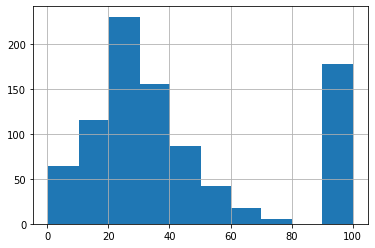

In [27]:
df['age_100'].hist()

### How to handle categorical missing values

#### 6. frequent categories imputation

Adv:
1. easy to implement
2. faster way to implement

Disadv:
1. since we are using the more frequent label, it may use them in over replacement of many missing values
2. it distorts the relation

In [28]:
df = pd.read_csv("train_new.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [29]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

<Axes: xlabel='BsmtQual'>

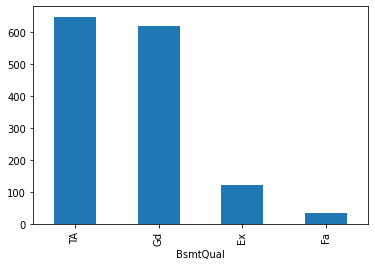

In [30]:
## compute frequency of every feature

df['BsmtQual'].value_counts().plot.bar()

<Axes: xlabel='FireplaceQu'>

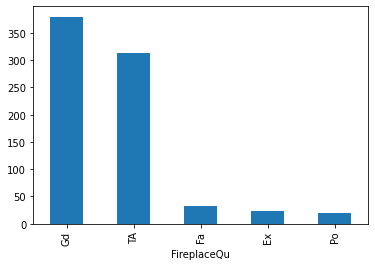

In [31]:
df['FireplaceQu'].value_counts().plot.bar()

<Axes: xlabel='GarageType'>

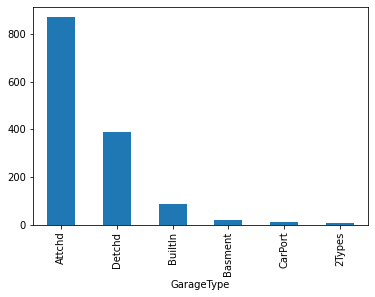

In [32]:
df['GarageType'].value_counts().plot.bar()

In [33]:
### Replacing function

def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [34]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_2756\4256482867.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(most_frequent_category,inplace=True)
C:\Users\Shrinath\AppData\Local\Temp\ipykernel_2756\4256482867.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [35]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [36]:
### Replacing function using mode

def impute_nan(df,variable):
    most_frequent_category = df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

#### Adding a variable to capture NAN

In [37]:
df = pd.read_csv("train_new.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [38]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [39]:
frequent = df['BsmtQual'].mode()[0]

df['BsmtQual'].fillna(frequent,inplace=True)

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_2756\948718310.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtQual'].fillna(frequent,inplace=True)


In [40]:
df['BsmtQual'].isnull().sum()

np.int64(0)

In [41]:
#### suppose if you have more frequent categories, we just replace NAN with new category

df = pd.read_csv("train_new.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [42]:
def impute_nan(df,variable):
    df[variable+"_newvar"] = np.where(df[variable].isnull(),"Missing",df[variable])

In [43]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [44]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


## Handle Categorical features

### 1. Onehot encoding

(Check notebook for onehot encoding)

### 2. Ordinal number encoding 

In [45]:
import datetime

today_date = datetime.datetime.today()
today_date

datetime.datetime(2024, 7, 28, 12, 22, 15, 25731)

In [46]:
today_date-datetime.timedelta(3)

datetime.datetime(2024, 7, 25, 12, 22, 15, 25731)

In [47]:
days  = [today_date - datetime.timedelta(x) for x in range(0,15)]

In [48]:
data = pd.DataFrame(days)
data.columns = ['Day']
data.head()

,Day
0,2024-07-28 12:22:15.025731
1,2024-07-27 12:22:15.025731
2,2024-07-26 12:22:15.025731
3,2024-07-25 12:22:15.025731
4,2024-07-24 12:22:15.025731


In [49]:
data['weekday'] = data['Day'].dt.day_name()
data.head()

,Day,weekday
0,2024-07-28 12:22:15.025731,Sunday
1,2024-07-27 12:22:15.025731,Saturday
2,2024-07-26 12:22:15.025731,Friday
3,2024-07-25 12:22:15.025731,Thursday
4,2024-07-24 12:22:15.025731,Wednesday


In [50]:
dict = {'Monday':1, 'Tuesday':2, 'Wednesday':3,
       'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
dict

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [51]:
data['weekday_ordinal'] = data['weekday'].map(dict)

In [52]:
data.head()

,Day,weekday,weekday_ordinal
0,2024-07-28 12:22:15.025731,Sunday,7
1,2024-07-27 12:22:15.025731,Saturday,6
2,2024-07-26 12:22:15.025731,Friday,5
3,2024-07-25 12:22:15.025731,Thursday,4
4,2024-07-24 12:22:15.025731,Wednesday,3


### 3. Count or freq Encoding

adv:
1. easy to use
2. not increasing feature space

disadv:
1. it will provide same weight if frequencies are same

In [53]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [54]:
columns = [1,3,5,6,7,8,9,13]
train_set = train_set[columns]

In [55]:
train_set.columns = ['employment','degree','status','designation','family_job','race','sex','country']
train_set.head()

,employment,degree,status,designation,family_job,race,sex,country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [56]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

employment : 9 labels
degree : 16 labels
status : 7 labels
designation : 15 labels
family_job : 6 labels
race : 5 labels
sex : 2 labels
country : 42 labels


In [57]:
dict_1 = train_set['country'].value_counts().to_dict()
dict_1

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Trinadad&Tobago': 19,
 ' Cambodia': 19,
 ' Thailand': 18,
 ' Laos': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [58]:
train_set['country_new'] = train_set['country'].map(dict_1)

In [59]:
train_set.head()

,employment,degree,status,designation,family_job,race,sex,country,country_new
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,95


#### 4. Target guided ordinal encoding

1. ordering the labels according to the target
2. Replace the labels by the joint prob of being 1 or 0

In [60]:
df = pd.read_csv('titanic.csv')
df = df[['Survived','Cabin']]
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [61]:
df.isnull().sum()

Survived      0
Cabin       687
dtype: int64

In [62]:
df['Cabin'].fillna('Missing',inplace=True)

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_2756\321717856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Missing',inplace=True)


In [63]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [64]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [65]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [66]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [67]:
ordinal_labels= df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [68]:
ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [69]:
df['Cabin_labels'] = df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


#### Probability ratio encoding

In [70]:
df = pd.read_csv('titanic.csv')
df = df[['Survived','Cabin']]
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [71]:
df['Cabin'].fillna('Missing',inplace=True)

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_2756\321717856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Missing',inplace=True)


In [72]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [73]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [74]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [76]:
prob_df = df.groupby(['Cabin'])['Survived'].mean()

In [78]:
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [79]:
prob_df['Died'] = 1-prob_df['Survived']
prob_df

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [80]:
prob_df['Probability_ratio'] = prob_df['Survived']/prob_df['Died']
prob_df

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [82]:
prob_encoded = prob_df['Probability_ratio'].to_dict()

In [83]:
df['Cabin_encoded'] = df['Cabin'].map(prob_encoded)
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
